## Generating Unif[0,1] in R

We show how to generate pseudo-random $Unif[0,1]$ in R. The process is very similar in Python. The theory is discussed in Lange 22.1 and 22.2. The Python code for random number generation is [here](https://jakevdp.github.io/PythonDataScienceHandbook/02.02-the-basics-of-numpy-arrays.html). We focus on what is going on behind the scenes in R.

Later we show how to transform $Unif[0,1]$ deviates to generate random numbers from other distributions, such as the bernoulli, exponential, and normal. 

In [23]:
ls(all.names=TRUE)
options(repr.plot.height=4,repr.plot.width=5)

[1] "a"               "gen_random_unif" "p"               ".pbd_env"       
[5] ".Random.seed"    "seed"            "x"

In [24]:
names(options())

[1] "add.smooth"                "bitmapType"               
 [3] "browser"                   "browserNLdisabled"        
 [5] "CBoundsCheck"              "check.bounds"             
 [7] "citation.bibtex.max"       "continue"                 
 [9] "contrasts"                 "defaultPackages"          
[11] "demo.ask"                  "deparse.cutoff"           
[13] "device"                    "device.ask.default"       
[15] "digits"                    "dvipscmd"                 
[17] "echo"                      "editor"                   
[19] "encoding"                  "example.ask"              
[21] "expressions"               "help.search.types"        
[23] "help.try.all.packages"     "HTTPUserAgent"            
[25] "internet.info"             "jupyter.base_display_func"
[27] "jupyter.display_mimetypes" "jupyter.in_kernel"        
[29] "jupyter.logfile"           "jupyter.log_level"        
[31] "jupyter.pager_classes"     "jupyter.plot_mimetypes"   
[33] "jupyter.rich_display"      "keep.source"              
[35] "keep.source.pkgs"          "locatorBell"              
[37] "mailer"                    "matprod"                  
[39] "max.print"                 "menu.graphics"            
[41] "na.action"                 "nwarnings"                
[43] "OutDec"                    "pager"                    
[45] "papersize"                 "PCRE_limit_recursion"     
[47] "PCRE_study"                "PCRE_use_JIT"             
[49] "pdfviewer"                 "pkgType"                  
[51] "printcmd"                  "prompt"                   
[53] "repos"                     "repr.function.highlight"  
[55] "repr.matrix.latex.colspec" "repr.matrix.max.cols"     
[57] "repr.matrix.max.rows"      "repr.plot.antialias"      
[59] "repr.plot.bg"              "repr.plot.family"         
[61] "repr.plot.height"          "repr.plot.pointsize"      
[63] "repr.plot.quality"         "repr.plot.res"            
[65] "repr.plot.width"           "repr.vector.quote"        
[67] "rl_word_breaks"            "scipen"                   
[69] "show.coef.Pvalues"         "showErrorCalls"           
[71] "show.error.messages"       "show.signif.stars"        
[73] "str"                       "str.dendrogram.last"      
[75] "stringsAsFactors"          "texi2dvi"                 
[77] "timeout"                   "ts.eps"                   
[79] "ts.S.compat"               "unzip"                    
[81] "useFancyQuotes"            "verbose"                  
[83] "warn"                      "warning.length"           
[85] "width"

In [25]:
ls(all.names=TRUE)

## R makes generating random numbers look effortless
runif(1)
runif(1)

[1] "a"               "gen_random_unif" "p"               ".pbd_env"       
[5] ".Random.seed"    "seed"            "x"

[1] 0.4481554

[1] 0.8935149

In [26]:
ls(all.names=TRUE) ## magically .Random.seed appears

[1] "a"               "gen_random_unif" "p"               ".pbd_env"       
[5] ".Random.seed"    "seed"            "x"

In [1]:
?.Random.seed

In [28]:
## .Random.seed contains RNG state
## .Random.seed[1] codes which random number generator
## first digit is generator for normal, second and third
## are for uniform, 00 = Wichmann-Hill
head(.Random.seed)
length(.Random.seed)


[1]         403         319  1049160699 -1547464031  -524926637 -1229216390

[1] 626

In [29]:
set.seed(1)
runif(1)
set.seed(1)
runif(1)

[1] 0.2655087

[1] 0.2655087

In [30]:
### default RNG is "Mersenne twister: a 623-dimensionally equidistributed
### uniform pseudo-random number generator"
### as the name suggests, it is fairly complicated
RNGkind()

[1] "Mersenne-Twister" "Inversion"

In [31]:
### we study the Wichmann-Hill RNG instead
## much simpler but gives the main ideas of what is going on
RNGkind("Wichmann-Hill")
RNGkind()


## how does set.seed set the state in .Random.seed
.Random.seed




[1] "Wichmann-Hill" "Inversion"

[1]   400 10739 13531 12550

In [32]:

## when you run set.seed(some number), this sets .Random.seed to new values
set.seed(1234)
.Random.seed
runif(1)
.Random.seed
runif(1)
set.seed(1234)
.Random.seed
runif(1)
runif(1)

[1]  400 7982 4765 9325

[1] 0.4144612

[1]  400 2817 1291 8454

[1] 0.6366651

[1]  400 7982 4765 9325

[1] 0.4144612

[1] 0.6366651


## Setting Seeds
When running simulation studies it is a good idea to set the seed once at the beginning of the program so that your results can be reproduced exactly. If you do not set the seed manually the seed is usually chosen based on the current time.


## Wichmann-Hill RNG
The next "random" number is a deterministic function of the current seed values the deterministic function mimicks randomness now show how this is done for Wichmann-Hill (WH). WH uses two ideas:

1. Multiplicative congruential generator
2. Fact that if $U_1$ and $U_2$ are $Unif[0,1]$, then $U_1 + U_2 \text{ mod } 1$ is $Unif[0,1]$

## Multiplicative congruential Generator


In [33]:
p <- 30269
a <- 171
seed <- 15

gen_random_unif <- function(){
    ## <<- is poor coding style, don't use in practice
    ## this sets the value of seed *outside* of the function
    seed <<- (a*seed) %% p 
    return(seed/p)
}



gen_random_unif()
gen_random_unif()
gen_random_unif()


## run this function 1000 times
x <- replicate(1000,gen_random_unif())



[1] 0.08474016

[1] 0.4905679

[1] 0.8871122

[1] 0.5008901

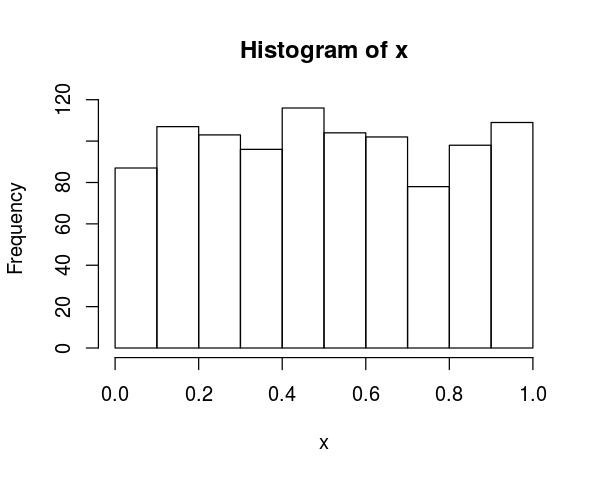

In [36]:
options(repr.plot.height=4,repr.plot.width=5)
hist(x)
mean(x)

## Testing Random Number Generators

High quality random number generators will pass the [Diehard tests](https://en.wikipedia.org/wiki/Diehard_tests)

In [37]:
### above mutliplicative generator repeats itself
### after p-1 random numbers
x <- replicate(p,gen_random_unif())

[1] 0.005120751 0.875648353 0.735868380 0.833493013 0.527305164 0.169182993

[1] 0.483068486 0.604711091 0.405596485 0.356998910 0.046813572 0.005120751

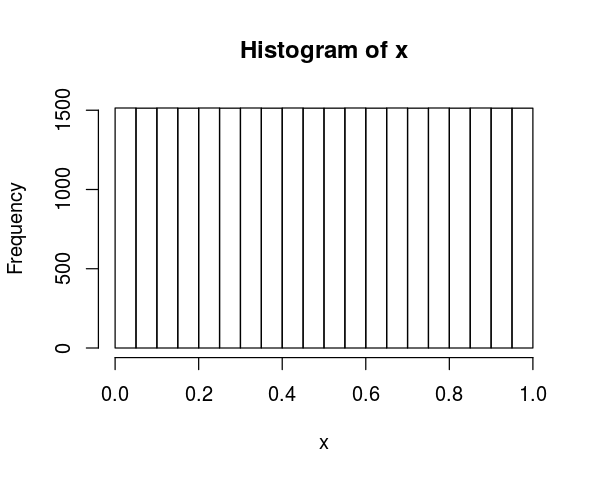

In [38]:
head(x)
tail(x)
hist(x)

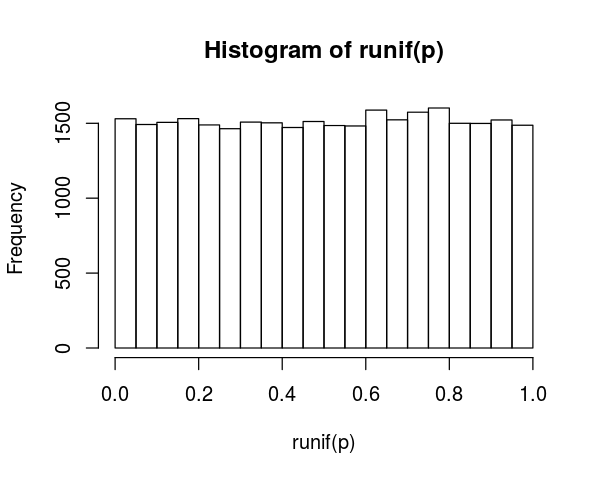

In [39]:
## more realistic level of uncertainty
hist(runif(p))

## Wichmann Hill

Idea: Generate 3 random uniform random deviates using 3 different multiplicative generators (3 $a$ values and 3 $p$).

In [41]:
## following code taken from examples in ?.Random.seed
## This shows how 'runif(.)' works for Wichmann-Hill,
## using only R functions:
p.WH <- c(30269, 30307, 30323)
a.WH <- c(  171,   172,   170)
next.WHseed <- function(i.seed = .Random.seed[-1]) {
    (a.WH * i.seed) %% p.WH
}

In [43]:
.Random.seed
.Random.seed[-1]

[1]   400  9948  7713 21154

[1]  9948  7713 21154

In [44]:
next.WHseed()

[1]  6044 23435 18066

In [46]:
runif(n=1)
.Random.seed

[1] 0.5687153

[1]   400  6044 23435 18066

In [47]:
## "predict" the next random number generated by R

### QUESTION: how does runif alter .Random.seed?
###           how to choose initial state?


### generates n random uniform from Wichmann-Hill
### using starting seed
myunif <- function(n,seed){
    p.WH <- c(30269, 30307, 30323)
    a.WH <- c(  171,   172,   170)
    X <- matrix(0,ncol=3,nrow=n+1)
    X[1,] <- seed
    for(ii in 2:(n+1)){
        X[ii,] <- (a.WH * X[ii-1,]) %% p.WH
    }
    x <- colSums(t(X) / p.WH) %% 1
    return(x[-1])
}


n <- 10
myunif(n,.Random.seed[-1])
runif(n) ## updates .Random.seed, so next run differet


[1] 0.42778764 0.86780905 0.13551236 0.87568392 0.78871853 0.09216536
 [7] 0.92921375 0.94893398 0.81051547 0.31044715

[1] 0.42778764 0.86780905 0.13551236 0.87568392 0.78871853 0.09216536
 [7] 0.92921375 0.94893398 0.81051547 0.31044715

In [ ]:
### wichmann hill has a cycle length approx 6.95×10^12